# CREDIT CARD FRAUD DETECTION USING ENSEMBLE MODEL

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score,classification_report,make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Loading data into a dataframe

In [6]:
data = pd.read_csv('/content/drive/MyDrive/fraud_detection/creditcard.csv')

## Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
data.shape

(284807, 31)

Out of 31columns Time, Amount, and Class (fraud or not fraud) are useful for analysis

### Amount VS Class

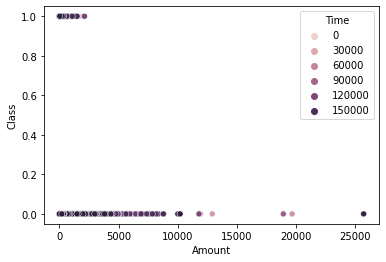

In [11]:
sns.scatterplot(data=data, x="Amount", y="Class",hue='Time',sizes="size")

There is no visible pattern to distiguish Normal and Fraud Transactions based on the Class and Amount in this dataset

## Time VS Amount

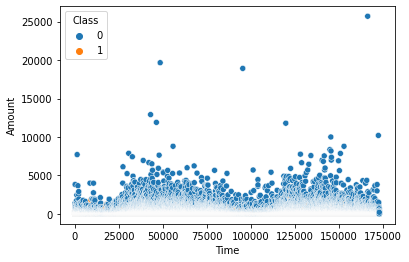

In [12]:
sns.scatterplot(data=data, x="Time", y="Amount",hue="Class",sizes="size")

Fraud finds generally on Amount less than $2000

Normal Transaction seems more on smaller Amounts

### Histogram for each parameter in the Dataset

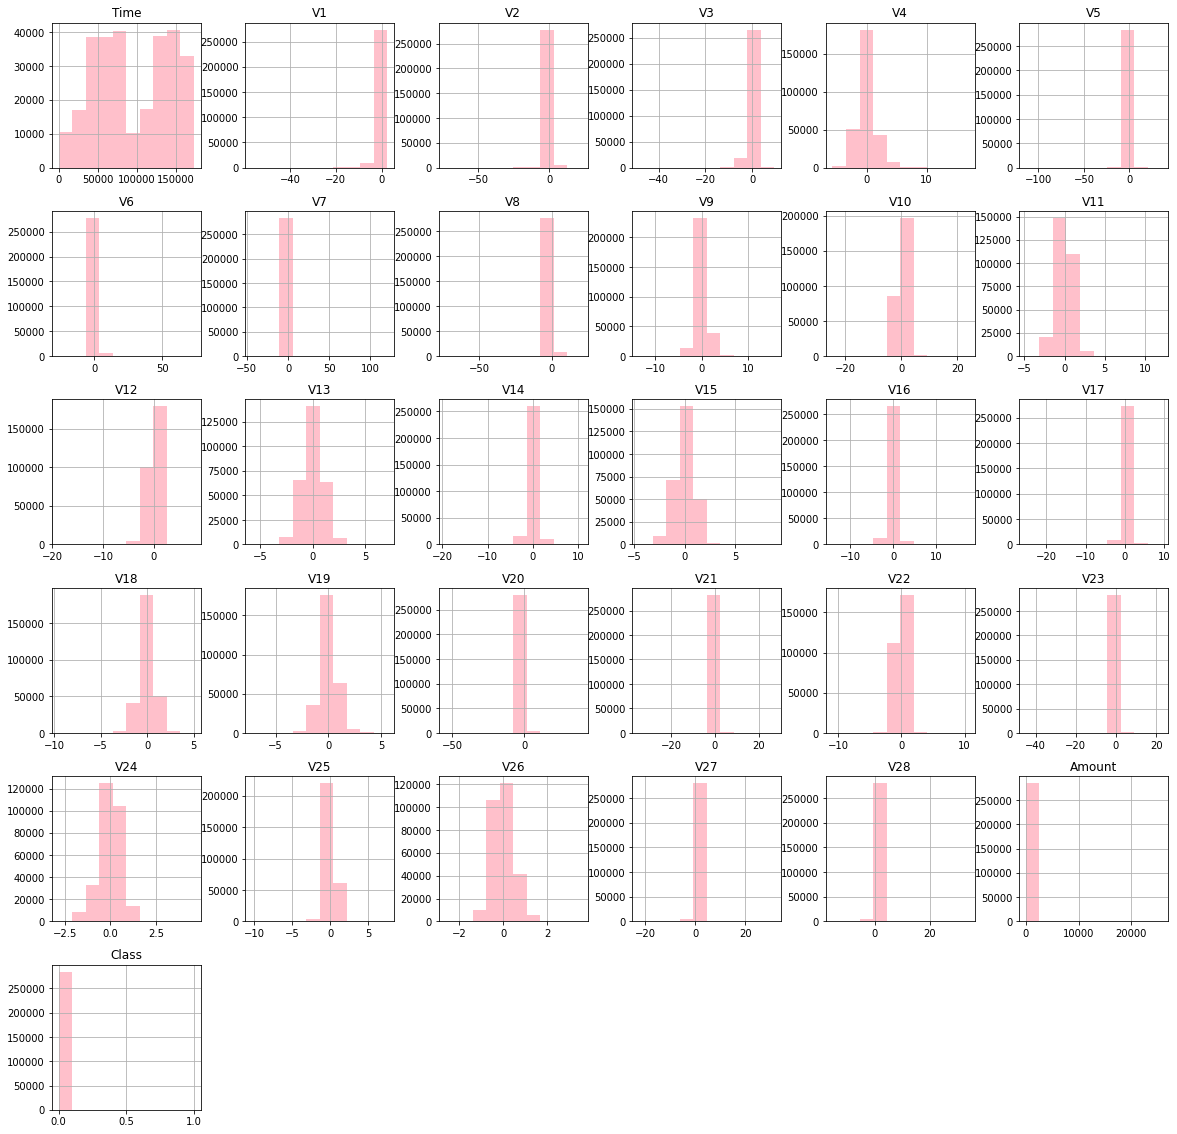

In [13]:
data.hist(figsize=(20,20),color='pink')
plt.show()

### Finding Correlation between features by drwaing Heatmap or Correlation matrix

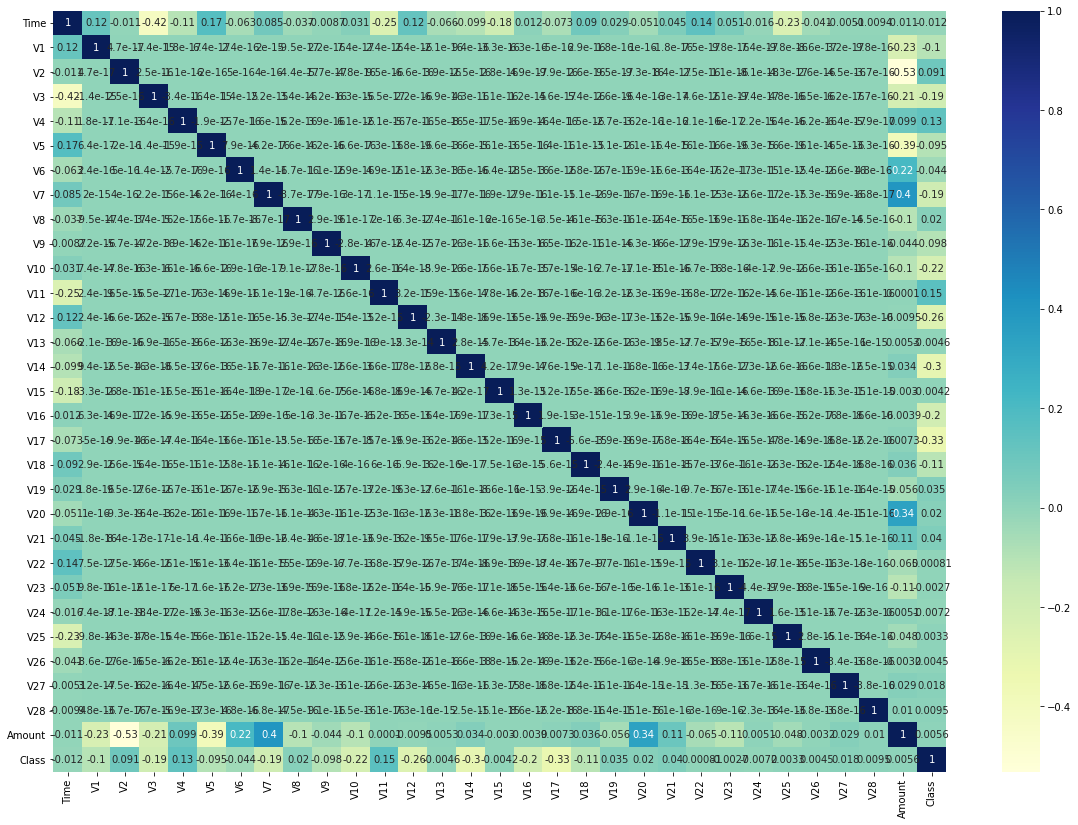

In [14]:
plt.figure(figsize=(20,14))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

#### V7,V20 and V6 have some Correlation with the Amount. Due data privacy issues 'Kaggle' Kept these V1 to V28 after doing PCA

### Checking relation between Correlated Features with Amount

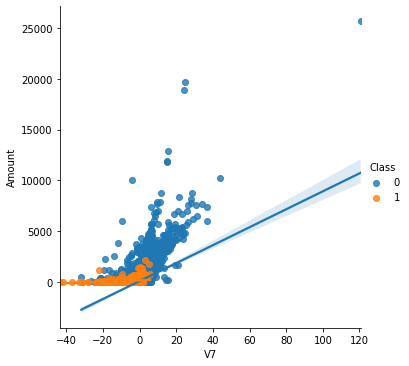

In [15]:
sns.lmplot(x="V7",y="Amount",data=data,hue="Class")

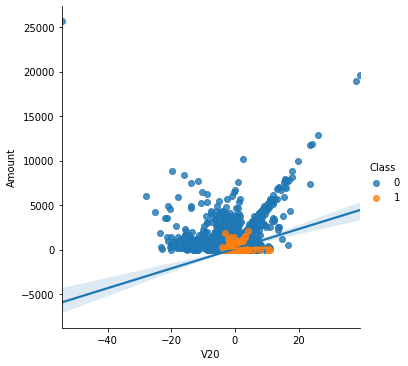

In [16]:
sns.lmplot(x="V20",y="Amount",data=data,hue="Class")

V7 and V20 features have Normal Class(0) Positive Slope while Fraud Class(1) Smaller Positive Slope

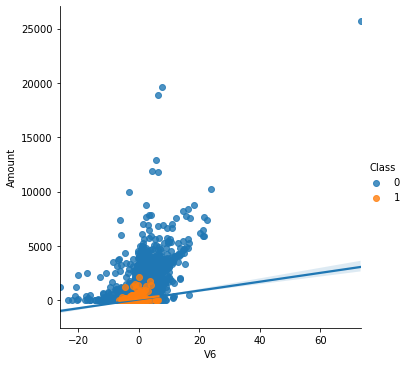

In [17]:
sns.lmplot(x="V6",y="Amount",data=data,hue="Class")

## Identifying the Fraud and Normal Transactions from the Class Coulmn

In [18]:
fraud = data.loc[data['Class']==1]
normal = data.loc[data['Class']==0]

In [19]:
print("Number of Fraud Transactions: ",len(fraud))   

Number of Fraud Transactions:  492


In [20]:
print("Number of Normal Transactions",len(normal))

Number of Normal Transactions 284315


Fraud Transactions are Minority Class(492) and Normal Transactions are the Majority Class(284315)

Fraud Transactions are Minority Class and "UnderSampling" can be done to make the dataset Balanced

### Bar Chart Fraud VS Normal Transction Before Resampling :

0    284315
1       492
Name: Class, dtype: int64

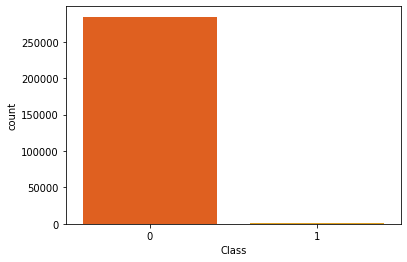

In [21]:
sns.countplot(data['Class'], palette='autumn')
data['Class'].value_counts()

### Bar Chart Fraud VS Normal Transction After Resampling

In [22]:
fraud_re= data.loc[data['Class'] == 1][:344]
normal_re=data.loc[data['Class']==0][:430]

In [23]:
fraud_re

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154668,102480.0,-1.929597,4.066413,-4.865184,5.898602,-0.552493,-1.555962,-3.833623,0.679512,-3.463765,-6.683689,7.021278,-11.102493,1.711755,-10.447633,-2.799076,-6.261741,-11.647158,-3.451436,-0.507537,0.942489,1.137212,0.674245,-0.531765,-0.433409,0.378659,0.198107,0.869694,0.228048,0.00,1
154670,102489.0,-2.296987,4.064043,-5.957706,4.680008,-2.080938,-1.463272,-4.490847,1.029246,-1.593249,-8.993811,7.864467,-10.649840,1.826591,-12.913632,-0.766330,-7.954098,-7.809635,-1.718511,3.832985,1.264954,1.089084,0.975398,-0.625530,-0.535181,0.247435,0.160400,0.969582,0.335041,104.00,1
154676,102542.0,-1.456876,3.740306,-7.404518,7.440964,-1.549878,-1.661697,-5.757213,1.615011,-2.194881,-6.807135,6.825793,-10.399749,1.836449,-11.872845,-3.642393,-6.044103,-9.750776,-3.116372,0.065317,0.529557,0.957897,0.145339,-0.044704,-0.544962,-0.757757,-0.005352,0.318152,-0.323554,2.28,1
154684,102572.0,-28.709229,22.057729,-27.855811,11.845013,-18.983813,6.474115,-43.557242,-41.044261,-13.320155,-24.588262,3.481952,-9.128341,-3.008255,0.796580,-2.102299,-5.660366,-13.032785,-5.392349,-0.901041,11.059004,-22.797604,8.316275,5.466230,0.023854,-1.527145,-0.145225,-5.682338,-0.439134,0.01,1


In [24]:
type(fraud_re)

pandas.core.frame.DataFrame

In [25]:
frames = [fraud_re, normal_re]

In [26]:
data_re =pd.concat(frames)

In [27]:
data_re

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,309.0,1.239526,0.602892,-0.257987,1.319581,-0.050805,-1.216528,0.235434,-0.192577,0.056127,-0.539114,-0.117825,-0.538678,-0.936745,-0.872397,1.158781,0.548129,0.723128,0.578882,-0.574888,-0.163520,-0.062742,-0.153895,-0.108973,0.246565,0.661412,-0.324202,0.025960,0.049254,1.00,0
426,309.0,1.031381,-0.089444,0.421362,0.620875,0.330242,1.351988,-0.287901,0.412094,0.313047,-0.414256,0.440656,1.313519,0.767262,-0.122085,0.783838,-1.587346,1.184231,-2.762266,-1.338869,-0.184406,-0.098008,0.077084,0.122698,-0.898894,0.166943,0.393916,0.053320,0.001398,14.60,0
427,310.0,-1.236351,-0.687029,2.093407,0.601217,0.782303,-1.167113,-0.675395,0.232563,0.500531,-0.565374,-1.050192,0.091748,-0.198063,-0.277611,-0.042639,0.357375,-0.653671,0.382050,-0.975039,0.129688,0.378832,0.841499,0.150103,0.391760,-0.542331,-0.531517,0.186280,0.230012,7.80,0
428,310.0,-1.013287,0.512380,0.837259,0.408468,2.078535,4.692662,-0.294088,0.898044,0.919347,0.321821,-1.049923,0.186010,-0.421530,-1.028747,-1.321201,-1.140561,0.252887,-0.218197,2.058913,0.207566,-0.470714,-0.879661,-0.147591,1.003181,0.118079,-0.460627,-0.271700,0.012446,22.09,0


0    430
1    344
Name: Class, dtype: int64

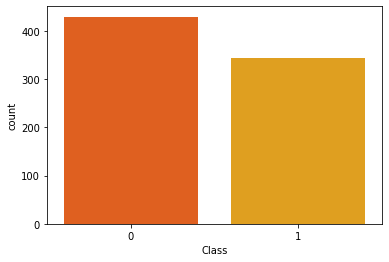

In [28]:
sns.countplot(data_re['Class'], palette='autumn')
data_re['Class'].value_counts()

NearMiss(0.8) Resample the Training Set into 430 Normal Transactions and 344 Fraud Transctions

## Defining Dependent and Independent variables

In [29]:
X = data.drop(['Class'], axis = 1)
y = data['Class']

##### y as Dependentant Variable and X as Indepenent Variable

## Splitting the Data into training and testing

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4,stratify=y)

In [31]:
X_train.shape, X_test.shape

((199364, 30), (85443, 30))

In [32]:
y_train.shape, y_test.shape

((199364,), (85443,))

# Data preprocessing

In [33]:
data.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

### Checking for missing values in the Dataset

In [34]:
data.isnull().values.any()

False

#### There is no missing values in the Dataset

### Finding Unique Values in Target Class

In [35]:
print(" Unique Values in the Target Class are :", data['Class'].unique())

 Unique Values in the Target Class are : [0 1]


#### Only Two Unique Values 0 and 1
##### 1 Represents the Fraud Transactions
##### 0 stands for the Normal Transactions

## Feature Scaling

In [36]:
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
X_train

array([[-1.2205599 ,  0.57260337,  0.06385969, ...,  0.07574569,
         0.01448349, -0.33846396],
       [-0.89692775,  0.56875497, -0.47953803, ..., -0.2836757 ,
         0.05193244,  0.19398858],
       [ 0.71767474, -3.61227207, -1.54776788, ..., -5.96820868,
         4.58446009, -0.13769285],
       ...,
       [ 1.00218721,  1.02311492, -0.05931292, ...,  0.01915539,
        -0.17906805, -0.32859062],
       [ 0.21570909, -0.48691898,  0.25333436, ..., -0.44133097,
        -0.5525775 , -0.3399194 ],
       [-1.01390779, -0.60359701, -0.02680539, ..., -0.42057985,
         0.25096022,  0.81648131]])

In [39]:
X_test = scaler.fit_transform(X_test)

In [40]:
X_test

array([[ 0.97969808, -0.50561576,  0.73750707, ...,  0.03670984,
         0.22451522, -0.29127988],
       [-1.39782895,  0.05927596,  0.77874787, ...,  0.97153262,
         0.18107382, -0.36219707],
       [ 0.1399253 ,  0.96196504, -0.34283956, ..., -0.06139117,
        -0.16856492, -0.15781075],
       ...,
       [ 0.90424176,  0.914575  ,  0.05856228, ..., -0.00694959,
        -0.11353763, -0.29198739],
       [-0.96487147,  0.55949129,  0.08489575, ..., -0.03241048,
         0.06943449, -0.11223897],
       [-1.42788929,  0.50193537, -0.44666266, ..., -0.05455318,
         0.00800938, -0.13675201]])

In [41]:
X_train.shape, X_test.shape

((199364, 30), (85443, 30))

In [42]:
len(fraud)

492

In [43]:
len(normal)

284315

## Resampling to handle the Class Imbalance

NearMiss(Undersampling Technique)

In [44]:
nr=NearMiss(0.8)

In [45]:
X_train_near,y_train_near =nr.fit_sample(X_train,y_train)

# Decision Tree

In [46]:

det= DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=100, min_samples_split=20,random_state=4)
det.fit(X_train_near, y_train_near)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

In [47]:
#Evaluating the model
y_pred = det.predict(X_test)

In [48]:
det.score(X_test, y_test)

0.2865184977119249

In [49]:
print(confusion_matrix(y_test,y_pred))

[[24340 60955]
 [    7   141]]


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44     85295
           1       0.00      0.95      0.00       148

    accuracy                           0.29     85443
   macro avg       0.50      0.62      0.22     85443
weighted avg       1.00      0.29      0.44     85443



# Random Forest

In [51]:
rnd= RandomForestClassifier(n_estimators=20,n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = 50) 
rnd.fit(X_train_near, y_train_near)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [52]:
#Evaluating the model
y_pred = rnd.predict(X_test)

In [53]:
rnd.score(X_test, y_test)

0.8254977002212001

In [54]:
print(confusion_matrix(y_test,y_pred))

[[70399 14896]
 [   14   134]]


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90     85295
           1       0.01      0.91      0.02       148

    accuracy                           0.83     85443
   macro avg       0.50      0.87      0.46     85443
weighted avg       1.00      0.83      0.90     85443



# k-nearest neighbors (KNN)

In [56]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_near, y_train_near)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
#Evaluating the model
y_pred = knn.predict(X_test)

In [58]:
knn.score(X_test, y_test)

0.7662652294512131

In [59]:
print(confusion_matrix(y_test,y_pred))

[[65335 19960]
 [   11   137]]


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     85295
           1       0.01      0.93      0.01       148

    accuracy                           0.77     85443
   macro avg       0.50      0.85      0.44     85443
weighted avg       1.00      0.77      0.87     85443



# LogisticRegression

In [61]:
log = LogisticRegression(class_weight='balanced')
log.fit(X_train_near, y_train_near)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
#Evaluating the model
y_pred = log.predict(X_test)

In [63]:
log.score(X_test, y_test)

0.5641772877824983

In [64]:
print(confusion_matrix(y_test,y_pred))

[[48065 37230]
 [    8   140]]


In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72     85295
           1       0.00      0.95      0.01       148

    accuracy                           0.56     85443
   macro avg       0.50      0.75      0.36     85443
weighted avg       1.00      0.56      0.72     85443



#  Support vector machine (SVM)

In [66]:
svm = SVC(kernel='rbf',class_weight='balanced',probability=True) 
svm.fit(X_train_near, y_train_near)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [67]:
#Evaluating the model
y_pred = svm.predict(X_test)

In [68]:
svm.score(X_test, y_test)

0.929929894783657

In [69]:
print(confusion_matrix(y_test,y_pred))

[[79324  5971]
 [   16   132]]


In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     85295
           1       0.02      0.89      0.04       148

    accuracy                           0.93     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.93      0.96     85443



# Comparing Model Performance

In [71]:
for clf in (log, rnd, knn, det, svm):
    clf.fit(X_train_near, y_train_near)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.5641772877824983
RandomForestClassifier 0.8254977002212001
KNeighborsClassifier 0.7662652294512131
DecisionTreeClassifier 0.2865184977119249
SVC 0.929929894783657


# Ensemble Model

### Ensemble model has multiple base models within the model, it acts and performs as a single model.
### When the base models are diverse and independent, the prediction error decreases 

### Two most popular ensemble methods are bagging and boosting

Bagging: Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data

Boosting: Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model.

# Majority Voting Classifier

In [72]:
vot_clf = VotingClassifier(estimators = [('lr', log), ('rnd', rnd), ('knn', knn),('dt', det),('svc', svm)], voting = 'hard')

In [73]:
for clf in (log, rnd, knn,det,svm, vot_clf):
    clf.fit(X_train_near, y_train_near)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.5641772877824983
RandomForestClassifier 0.8254977002212001
KNeighborsClassifier 0.7662652294512131
DecisionTreeClassifier 0.2865184977119249
SVC 0.929929894783657
VotingClassifier 0.7896492398441066


 # Confusion matrix

In [74]:
print(confusion_matrix(y_test,y_pred))

[[67331 17964]
 [    9   139]]


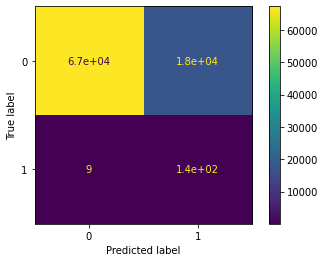

In [75]:
plot_confusion_matrix(vot_clf, X_test, y_test )

# ROC curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters

In [76]:
votingclf_fpr,votingclf_tpr, threshold = roc_curve(y_test, y_pred)

In [77]:
auc_votingclf = auc(votingclf_fpr, votingclf_tpr)

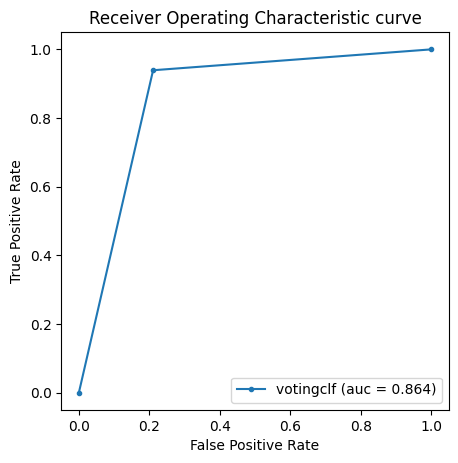

In [78]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(votingclf_fpr, votingclf_tpr, marker='.', label='votingclf (auc = %0.3f)' % auc_votingclf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend()

plt.show()

In [79]:
roc_curve(y_test,y_pred)

(array([0.        , 0.21061024, 1.        ]),
 array([0.        , 0.93918919, 1.        ]),
 array([2, 1, 0]))

# Cross Validating Models

Split the dataset into 10 subsets(folds) Perform training on the all the subsets but leave one subset for the evaluation of the trained model. Iiterate 10 times with a different subset reserved for testing purpose each time

In [93]:
kf =KFold(n_splits =10 ,shuffle=True, random_state=1)

### Cross Validation score for Decision Tree

In [88]:
cross_val_score(det,X,y,cv=kf,scoring="f1")


array([0.8       , 0.66666667, 0.77894737, 0.73076923, 0.73809524,
       0.85217391, 0.85245902, 0.82978723, 0.73076923, 0.75555556])

### Cross Validation score for Support Vector Machine

In [ ]:
cross_val_score(svm,X,y,cv=kf,scoring="f1")


### Cross Validation score for Logistic Regression

In [ ]:
cross_val_score(log,X,y,cv=kf,scoring="f1")


### Cross Validation score for KNN

In [94]:
cross_val_score(knn,X,y,cv=kf,scoring="f1")


array([0.07692308, 0.14634146, 0.11764706, 0.24137931, 0.25531915,
       0.2       , 0.25      , 0.18867925, 0.03921569, 0.25      ])

### Cross Validation score for Random Forest

In [ ]:
cross_val_score(rnd,X,y,cv=kf,scoring="f1")

# AdaBoost Model

In [80]:
adb = AdaBoostClassifier()
model = adb.fit(X_train_near, y_train_near)
y_pred_adb = model.predict(X_test)
y_pred_adb

array([0, 0, 1, ..., 1, 0, 1])

# Evaluating the Model

In [81]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       1.00      0.36      0.53     85295
           1       0.00      0.94      0.01       148

    accuracy                           0.36     85443
   macro avg       0.50      0.65      0.27     85443
weighted avg       1.00      0.36      0.53     85443



In [82]:
print(accuracy_score(y_test, y_pred_adb))

0.3621010498226888


## Parameters Tuning

The most important parameters of AdaBoost are:

base_estimator

n_estimators

learning_rate

Using SVM as a base estimator

In [83]:
svc= SVC(probability = True, kernel='linear')
adb = AdaBoostClassifier(n_estimators=10,base_estimator = svc, learning_rate= 0.01)

## Training and Predicting the AdaBoost Classifier

In [84]:
model = adb.fit(X_train_near, y_train_near)
y_pred_adb = model.predict(X_test)
y_pred_adb

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.19      0.83      0.31       148

    accuracy                           0.99     85443
   macro avg       0.59      0.91      0.65     85443
weighted avg       1.00      0.99      1.00     85443



In [86]:
print(accuracy_score(y_test, y_pred_adb))

0.993516145266435


In [87]:
print(confusion_matrix(y_test,y_pred_adb))

[[84766   529]
 [   25   123]]


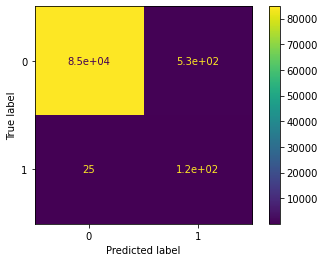

In [88]:
plot_confusion_matrix(model, X_test, y_test )

In [89]:
adaboost_fpr,adaboost_tpr, threshold = roc_curve(y_test, y_pred_adb)

In [90]:
auc_adaboost = auc(adaboost_fpr, adaboost_tpr)

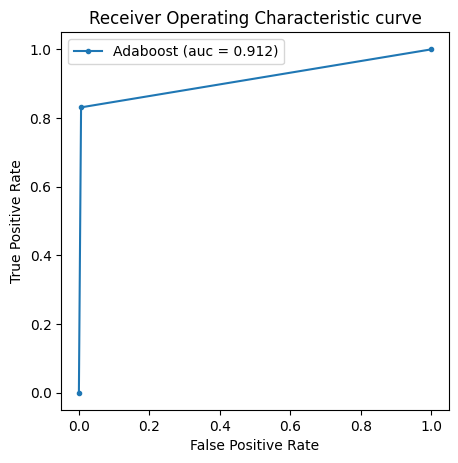

In [91]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(adaboost_fpr, adaboost_tpr, marker='.', label='Adaboost (auc = %0.3f)' % auc_adaboost)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend()

plt.show()

In [ ]:
cross_val_score(model,X,y,cv=kf,scoring="f1")